In [1]:
#Getting the coefficients 

# Start from importing necessary packages.
import warnings
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import decomposition
from IPython.display import display
from sklearn import metrics # for evaluations
from sklearn.datasets import make_blobs, make_circles # for generating experimental data
from sklearn.preprocessing import StandardScaler # for feature scaling
from sklearn.cluster import KMeans 
from sklearn.cluster import DBSCAN
import csv
import pandas as pd
import performance_measures
# make matplotlib plot inline (Only in Ipython).
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
lyrics = pd.read_csv('all_features.csv', sep=',', encoding = "ISO-8859-1")
X_lyrics = lyrics[["sadness_verse","joy_verse","fear_verse","disgust_verse","anger_verse","sadness_chorus","joy_chorus","fear_chorus","disgust_chorus","anger_chorus","Genre","Energy","Danceability","Mode","Valence"]].as_matrix()
X_lyrics

array([[ 0.297842,  0.643527,  0.023434, ...,  0.303   ,  1.      ,  0.424   ],
       [ 0.403503,  0.377848,  0.154008, ...,  0.883   ,  1.      ,  0.862   ],
       [ 0.194528,  0.10014 ,  0.400606, ...,  0.702   ,  0.      ,  0.603   ],
       ..., 
       [ 0.571947,  0.539841,  0.057515, ...,  0.394   ,  1.      ,  0.073   ],
       [ 0.423553,  0.447584,  0.174226, ...,  0.478   ,  1.      ,  0.6     ],
       [ 0.155213,  0.362808,  0.061548, ...,  0.405   ,  0.      ,  0.444   ]])

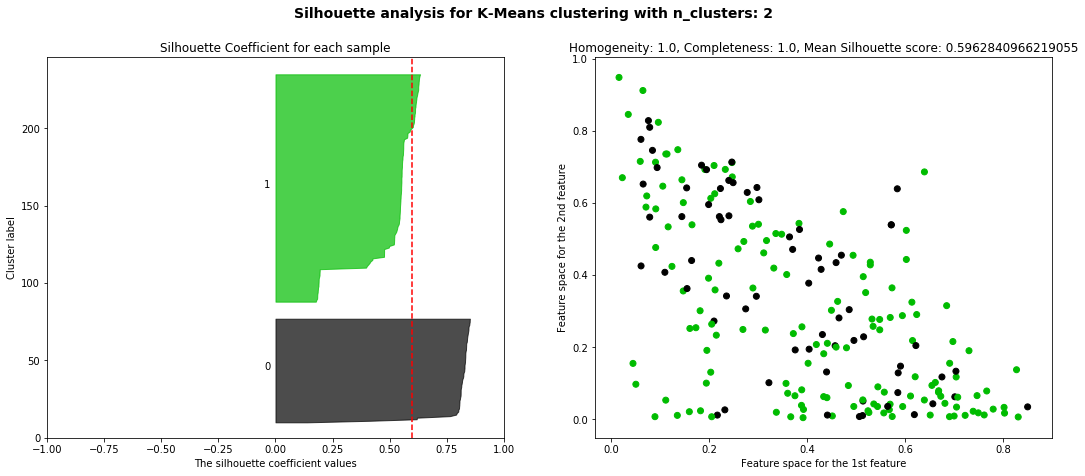

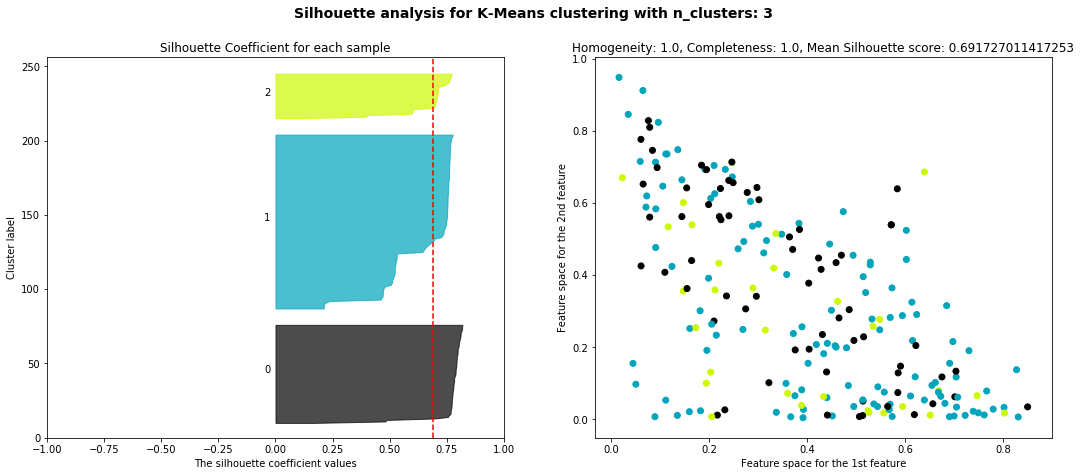

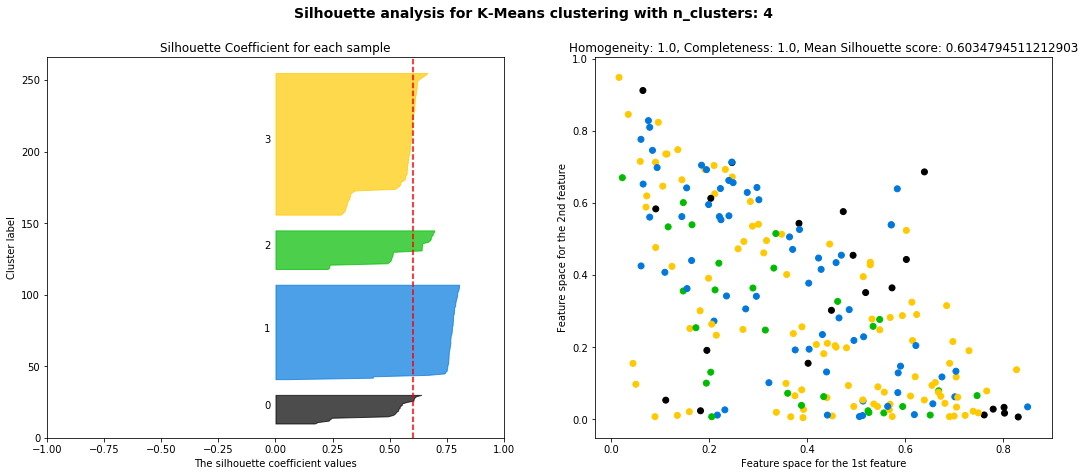

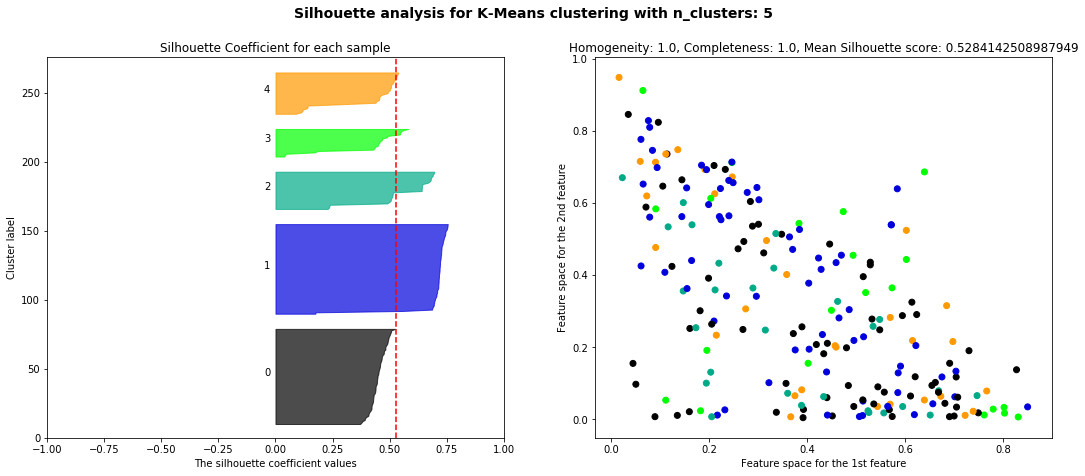

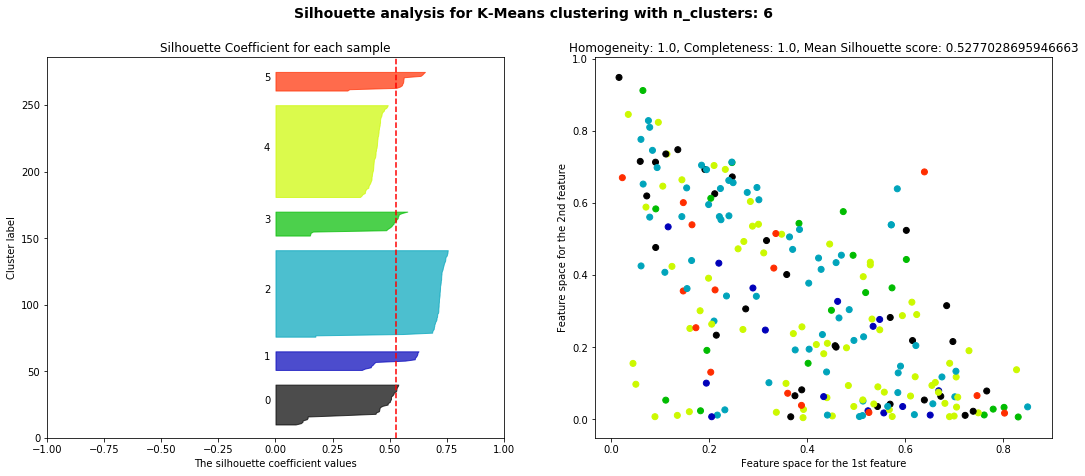

In [3]:
X_lyrics = performance_measures.silhouette_coefficient(X_lyrics)   

In [4]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X[rand_X[j]].reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

hopkins(X_lyrics)

0.7056521678961486

In [5]:
lyrics = pd.read_csv('maximum_emotion.csv', sep=',', encoding = "ISO-8859-1")
Y_lyrics = lyrics[["verse_emotion","chorus_emotion","Genre","Energy","Danceability","Valence","Mode"]].as_matrix()
Y_lyrics 

array([[  1.   ,   1.   ,   4.   , ...,   0.303,   0.424,   1.   ],
       [  0.   ,   1.   ,   5.   , ...,   0.883,   0.862,   1.   ],
       [  4.   ,   1.   ,  22.   , ...,   0.702,   0.603,   0.   ],
       ..., 
       [  0.   ,   3.   ,   3.   , ...,   0.394,   0.073,   1.   ],
       [  1.   ,   1.   ,   3.   , ...,   0.478,   0.6  ,   1.   ],
       [  4.   ,   0.   ,   3.   , ...,   0.405,   0.444,   0.   ]])

array([[  1.   ,   1.   ,   4.   , ...,   0.303,   0.424,   1.   ],
       [  0.   ,   1.   ,   5.   , ...,   0.883,   0.862,   1.   ],
       [  4.   ,   1.   ,  22.   , ...,   0.702,   0.603,   0.   ],
       ..., 
       [  0.   ,   3.   ,   3.   , ...,   0.394,   0.073,   1.   ],
       [  1.   ,   1.   ,   3.   , ...,   0.478,   0.6  ,   1.   ],
       [  4.   ,   0.   ,   3.   , ...,   0.405,   0.444,   0.   ]])

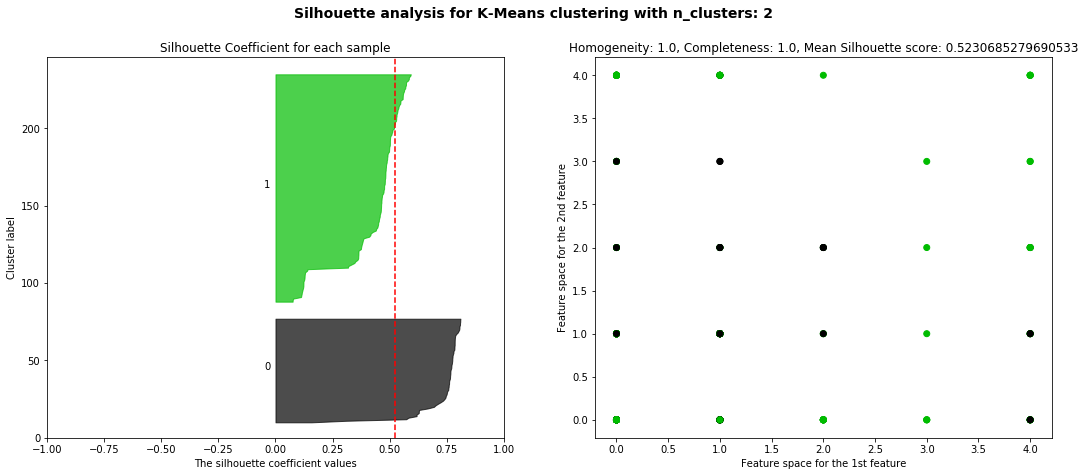

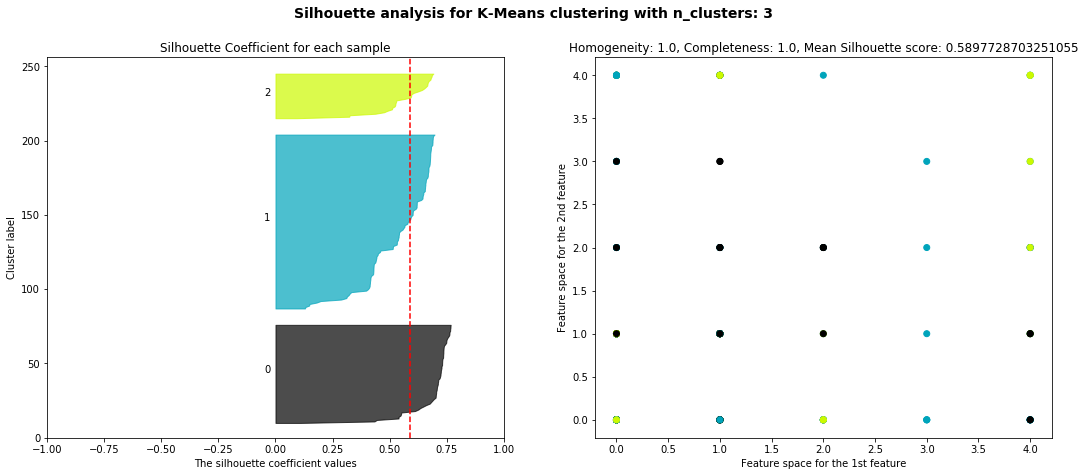

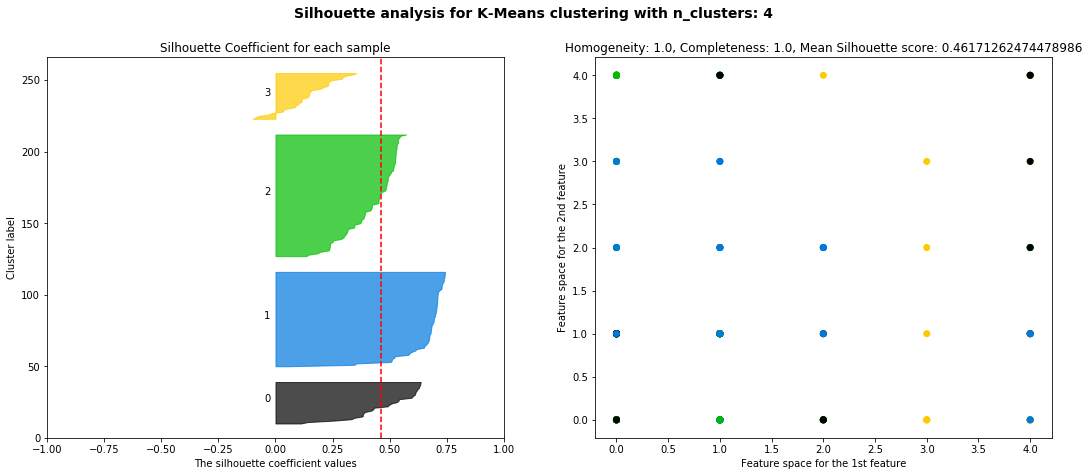

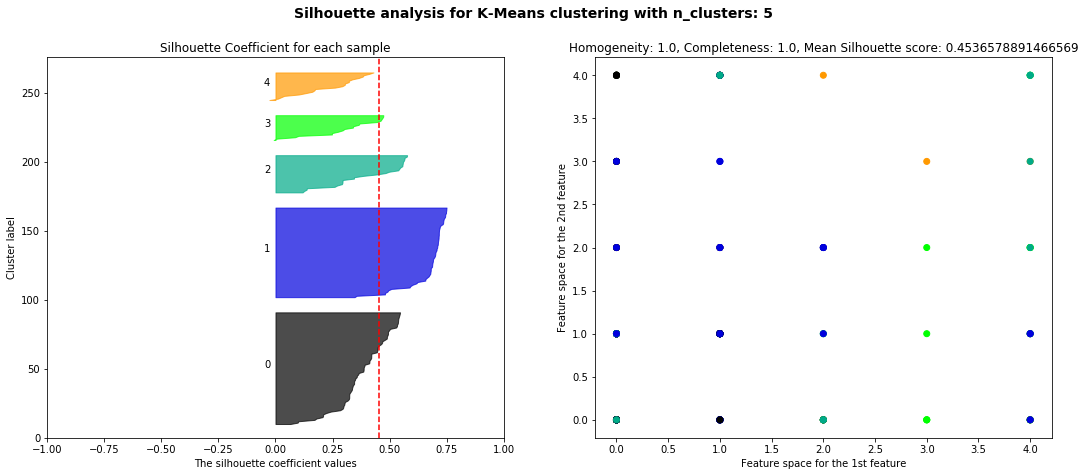

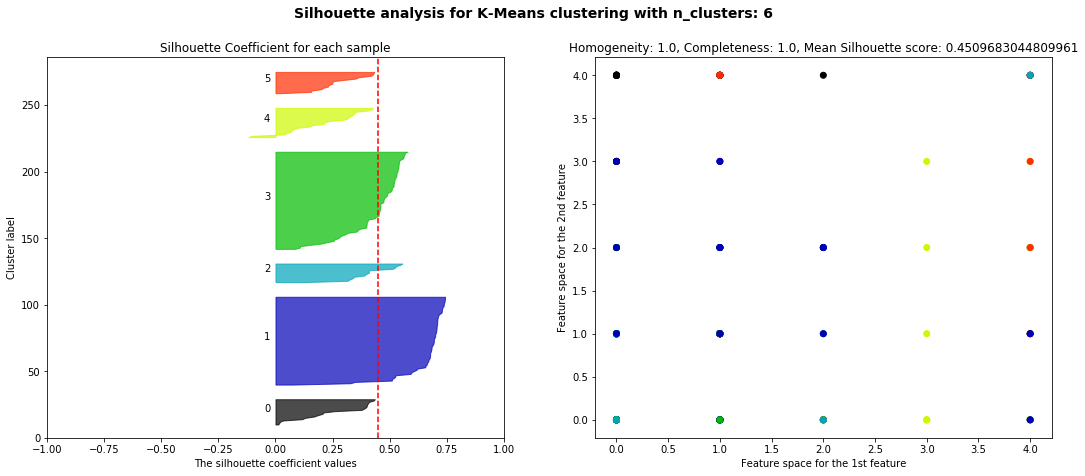

In [6]:
performance_measures.silhouette_coefficient(Y_lyrics)   

In [2]:
songs = pd.read_csv('classification-data.csv', sep=',', encoding = "ISO-8859-1")
z_lyrics = songs[["sadness_verse","joy_verse","fear_verse","disgust_verse","anger_verse","sadness_chorus","joy_chorus","fear_chorus","disgust_chorus","anger_chorus","Genre","Energy","Danceability","Mode","Valence"]].as_matrix()
z_lyrics 


array([[ 0.755442,  0.078146,  0.08736 , ...,  0.276   ,  0.      ,  0.0842  ],
       [ 0.455974,  0.203143,  0.36686 , ...,  0.478   ,  0.      ,  0.208   ],
       [ 0.505373,  0.272861,  0.028019, ...,  0.4     ,  1.      ,  0.352   ],
       ..., 
       [ 0.529145,  0.428521,  0.026457, ...,  0.507   ,  1.      ,  0.327   ],
       [ 0.730552,  0.190255,  0.106638, ...,  0.363   ,  1.      ,  0.647   ],
       [ 0.44162 ,  0.011451,  0.091995, ...,  0.17    ,  1.      ,  0.0742  ]])

array([[ 0.755442,  0.078146,  0.08736 , ...,  0.276   ,  0.      ,  0.0842  ],
       [ 0.455974,  0.203143,  0.36686 , ...,  0.478   ,  0.      ,  0.208   ],
       [ 0.505373,  0.272861,  0.028019, ...,  0.4     ,  1.      ,  0.352   ],
       ..., 
       [ 0.529145,  0.428521,  0.026457, ...,  0.507   ,  1.      ,  0.327   ],
       [ 0.730552,  0.190255,  0.106638, ...,  0.363   ,  1.      ,  0.647   ],
       [ 0.44162 ,  0.011451,  0.091995, ...,  0.17    ,  1.      ,  0.0742  ]])

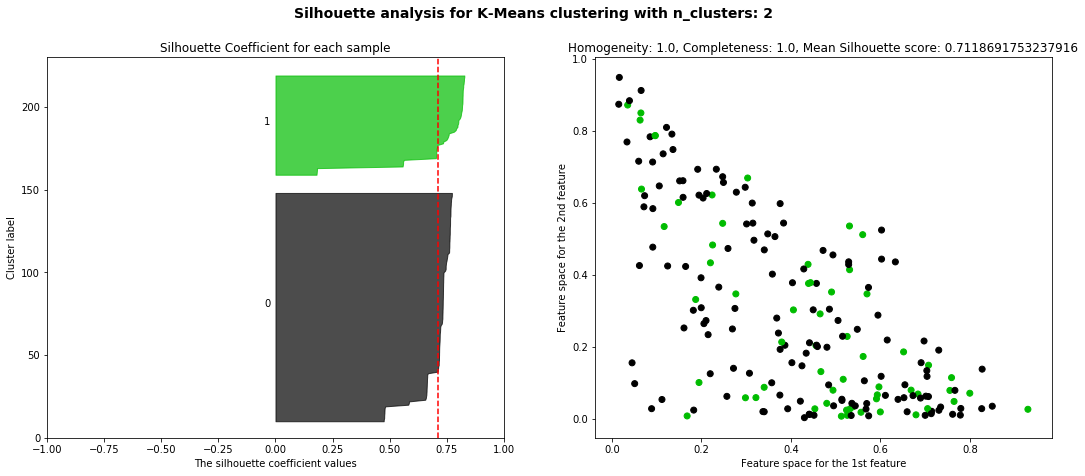

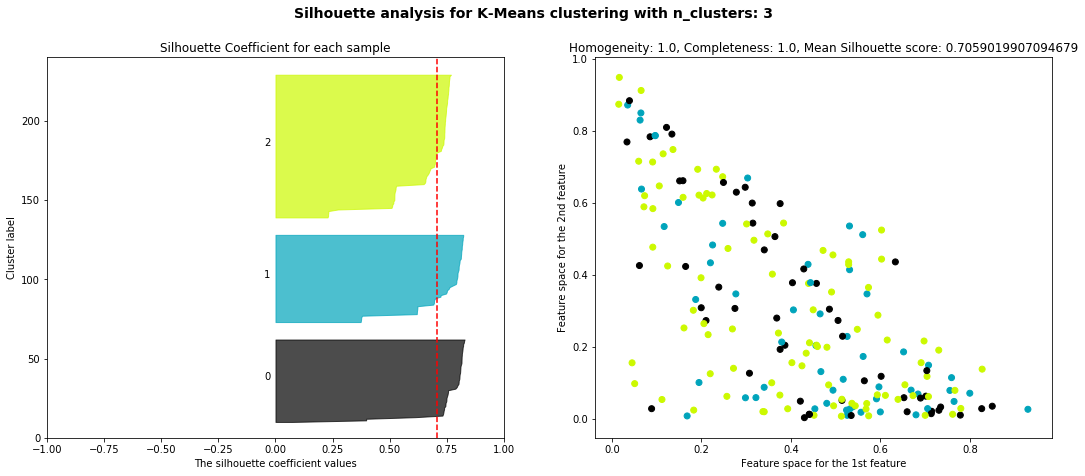

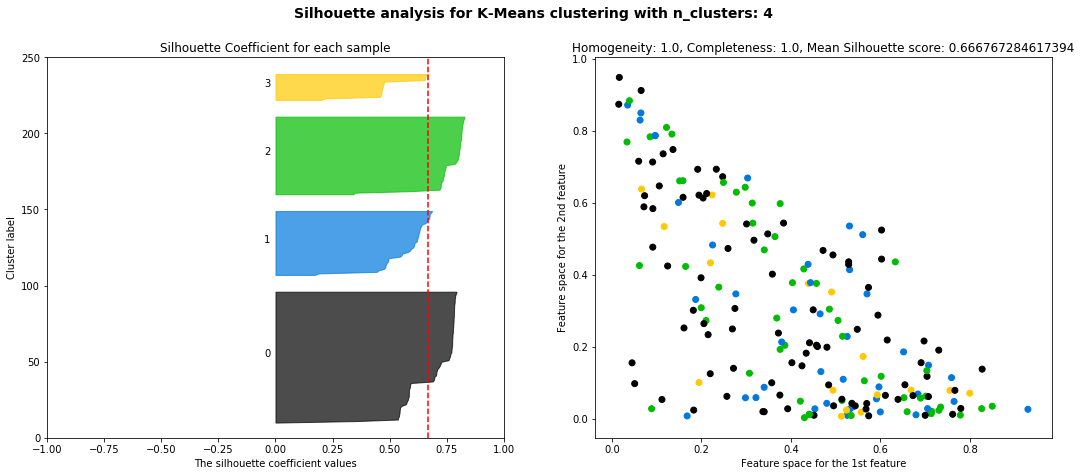

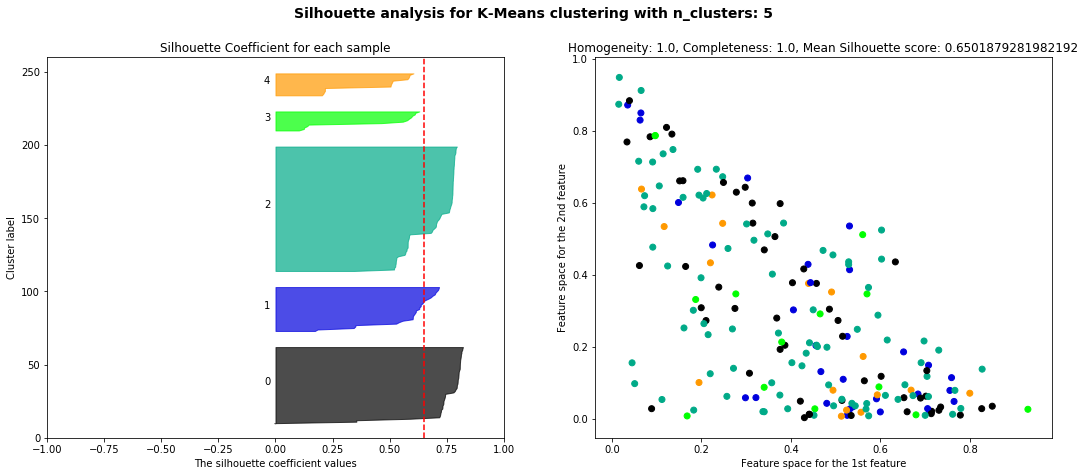

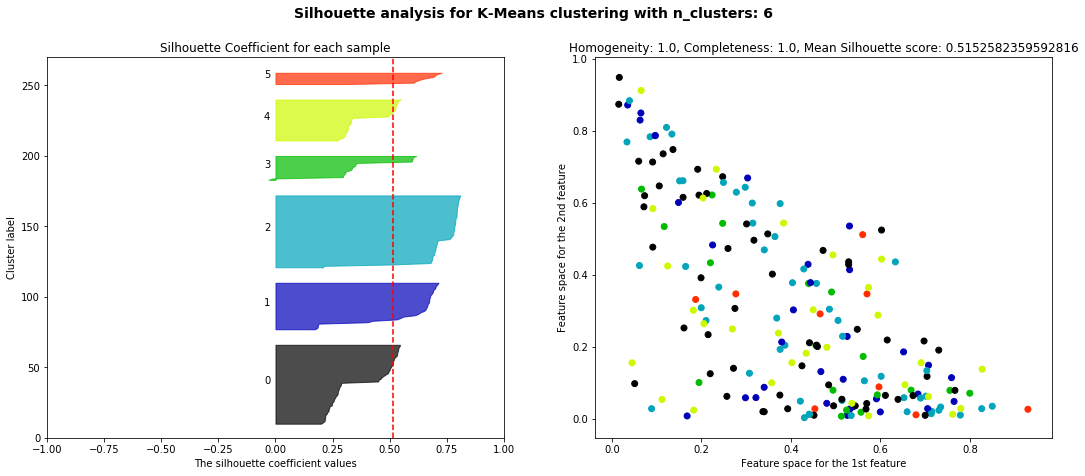

In [3]:
performance_measures.silhouette_coefficient(z_lyrics)   